In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# 🎯 Step 1: Load the data
df = pd.read_csv("multi_season_team_summary.csv")

# 🎯 Step 2: Split into training (past seasons) and prediction (current season)
train_df = df[df["cup_winner"].notnull()].copy()
predict_df = df[df["season"] == "2024-2025"].copy()

# 🎯 Step 3: Define features and target
features = ["wins", "goal_diff", "win_pct", "elo", "playoff_games"]

X_train = train_df[features]
y_train = train_df["cup_winner"].astype(int)

X_predict = predict_df[features]

# 🎯 Step 4: Train the logistic regression model (with tuning)
model = LogisticRegression(
    C=100,                # Looser regularization for flexibility
    class_weight="balanced",  # Adjust for imbalance (few Cup winners)
    solver="liblinear",   # Best for smaller datasets
    max_iter=1000         # Extra iterations just in case
)
model.fit(X_train, y_train)

# 🎯 Step 5: Predict probabilities and classes for 2024–25
predict_df["prob_cup_win"] = model.predict_proba(X_predict)[:, 1]
predict_df["predicted"] = model.predict(X_predict)

# 🎯 Step 6: Sort teams by most likely to win
predict_df = predict_df.sort_values(by="prob_cup_win", ascending=False)

# 🎯 Step 7: Save detailed predictions
predict_df.to_csv("2024_2025_predictions_full.csv", index=False)

# 🎯 Step 8: Also save a simpler version (just for quick visualization)
predict_df[["team", "season", "prob_cup_win", "predicted"]].to_csv(
    "2024_2025_predictions_simple.csv", index=False
)

# 🎯 Step 9: Print results
print("🏆 2024–25 Stanley Cup Predictions (Top Teams):\n")
print(predict_df[["team", "season", "wins", "goal_diff", "win_pct", "elo", "playoff_games", "prob_cup_win"]].head(10))

# 🎯 Step 10: (Optional) Check training dataset size
print(f"\n🧹 Model was trained on {len(train_df)} teams with {y_train.sum()} actual Cup winners.")


🏆 2024–25 Stanley Cup Predictions (Top Teams):

    team     season  wins  goal_diff   win_pct   elo  playoff_games  \
140  WPG  2024-2025    58         84  0.682353  1621              3   
155  TBL  2024-2025    47         69  0.559524  1521              2   
157  WSH  2024-2025    53         56  0.623529  1545              3   
143  VGK  2024-2025    51         52  0.600000  1547              3   
150  DAL  2024-2025    52         51  0.611765  1550              3   
144  COL  2024-2025    50         45  0.588235  1559              3   
145  LAK  2024-2025    50         46  0.588235  1583              3   
154  CAR  2024-2025    49         37  0.576471  1520              3   
136  TOR  2024-2025    55         43  0.647059  1632              3   
131  FLA  2024-2025    49         35  0.583333  1550              2   

     prob_cup_win  
140  6.373271e-08  
155  1.105065e-08  
157  1.651591e-09  
143  8.167638e-10  
150  6.191054e-10  
144  1.862367e-10  
145  1.458526e-10  
154  8.798

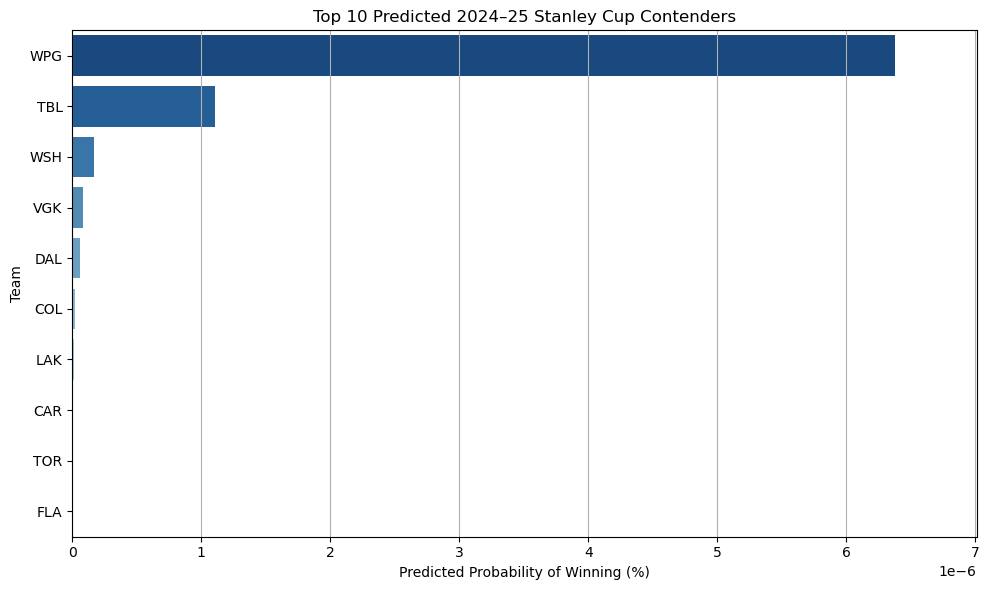

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Top 10 Predicted Cup Contenders
top10 = predict_df.head(10).copy()

# Scale probabilities to percentages
top10["prob_cup_win_pct"] = top10["prob_cup_win"] * 100

plt.figure(figsize=(10, 6))
sns.barplot(data=top10, x="prob_cup_win_pct", y="team", palette="Blues_r")

plt.title("Top 10 Predicted 2024–25 Stanley Cup Contenders")
plt.xlabel("Predicted Probability of Winning (%)")
plt.ylabel("Team")
plt.xlim(0, top10["prob_cup_win_pct"].max() * 1.1)
plt.grid(axis='x')
plt.tight_layout()
plt.show()


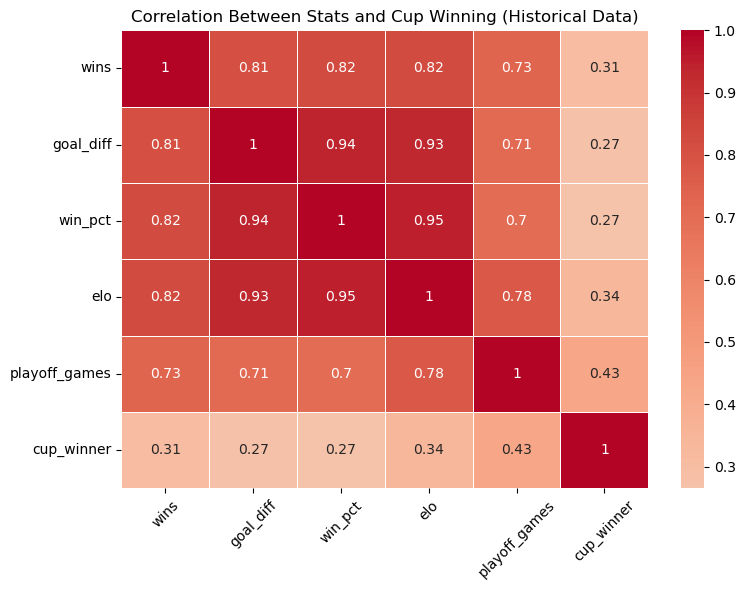

In [13]:
# Only use historical data for correlation (known Cup winners)
train_numeric = train_df[["wins", "goal_diff", "win_pct", "elo", "playoff_games", "cup_winner"]]

# Compute correlation matrix
corr_matrix = train_numeric.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, linewidths=0.5)

plt.title("Correlation Between Stats and Cup Winning (Historical Data)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


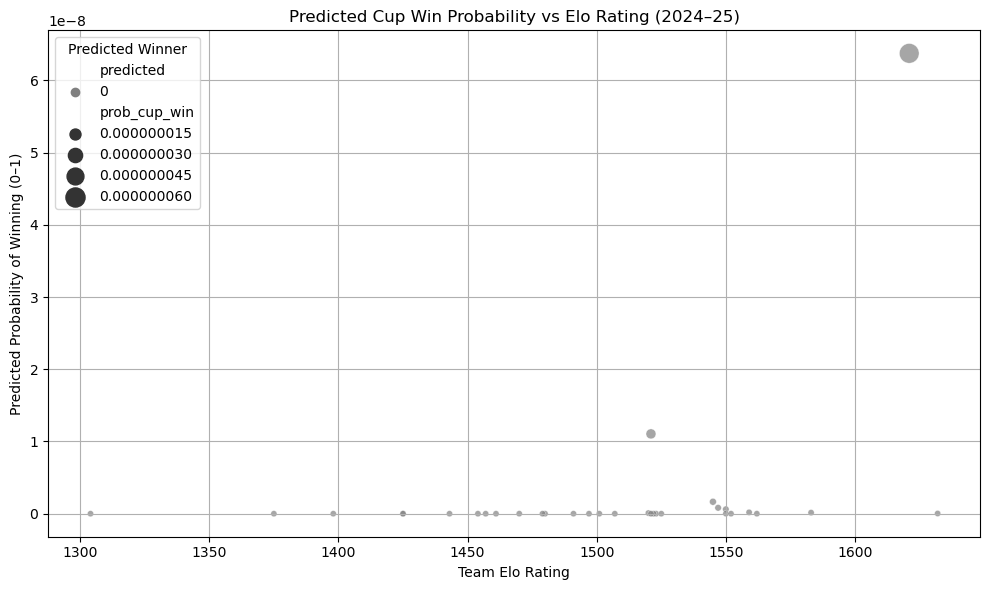

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=predict_df,
    x="elo",
    y="prob_cup_win",
    hue="predicted",
    palette={0: "gray", 1: "blue"},
    size="prob_cup_win",
    sizes=(20, 200),
    alpha=0.7
)

plt.title("Predicted Cup Win Probability vs Elo Rating (2024–25)")
plt.xlabel("Team Elo Rating")
plt.ylabel("Predicted Probability of Winning (0–1)")
plt.grid(True)
plt.legend(title="Predicted Winner")
plt.tight_layout()
plt.show()


In [17]:
# Basic non-visual stats for your 2024–25 predictions
print("\n📋 Quick EDA on 2024–25 Predictions:")

print("\nNumber of teams predicted to win the Cup:")
print(predict_df["predicted"].value_counts())

print("\nTop 5 Teams by Predicted Probability:")
print(predict_df[["team", "elo", "wins", "goal_diff", "prob_cup_win"]].head(5))

print("\nAverage Elo, Wins, and Goal Diff among Predicted Cup Winners:")
print(predict_df[predict_df["predicted"] == 1][["elo", "wins", "goal_diff"]].mean())

print("\nLowest Predicted Probability for a 'predicted = 1' Team:")
print(predict_df[predict_df["predicted"] == 1]["prob_cup_win"].min())

print("\nHighest Predicted Probability Overall:")
print(predict_df["prob_cup_win"].max())



📋 Quick EDA on 2024–25 Predictions:

Number of teams predicted to win the Cup:
0    32
Name: predicted, dtype: int64

Top 5 Teams by Predicted Probability:
    team   elo  wins  goal_diff  prob_cup_win
140  WPG  1621    58         84  6.373271e-08
155  TBL  1521    47         69  1.105065e-08
157  WSH  1545    53         56  1.651591e-09
143  VGK  1547    51         52  8.167638e-10
150  DAL  1550    52         51  6.191054e-10

Average Elo, Wins, and Goal Diff among Predicted Cup Winners:
elo         NaN
wins        NaN
goal_diff   NaN
dtype: float64

Lowest Predicted Probability for a 'predicted = 1' Team:
nan

Highest Predicted Probability Overall:
6.373270968380067e-08
